In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import tensorflow as tf
import numpy as np
from models import *
import pickle
import matplotlib.pyplot as plt
from imageio import imread
import json
gpu = tf.config.experimental.list_physical_devices('GPU')[0]
tf.config.experimental.set_memory_growth(gpu, True)
# tf.keras.backend.set_floatx('float16')
# tf.keras.backend.set_epsilon(1e-4)

In [3]:
with open('tokenizer.pickle', 'rb') as f:
    tokenizer = pickle.loads(f.read())

In [4]:
with open('annotations/captions_train2014.json', 'r') as f:
    train_instances = json.loads(f.read())

with open('annotations/captions_val2014.json', 'r') as f:
    val_instances = json.loads(f.read())

train_filenames = {
    image['id']: image['file_name']+'.npy'
    for image in train_instances['images']
}

with open('annotations/captions_val2014.json') as f:
    val_images = json.loads(f.read())['images']

val_filenames = {
    image['id']: image['file_name']+'.npy'
    for image in val_instances['images']
}

In [5]:
model = ImageCaptioning(attention_hidden_units=1024, hidden_state_size=512, embedding_dim=512, vocab_size=5000, input_shape=(64, 2048))
model.build([(None, 64, 2048), (None, None)])
model.load_weights('models/weights.06-1.2431.hdf5')
image_model = tf.keras.applications.InceptionV3(
    include_top=False, weights='imagenet')

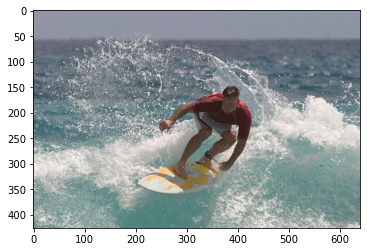

In [48]:
# filename = 'COCO_val2014_000000047571.jpg'
# filename = 'COCO_val2014_000000047596.jpg'
# filename = 'val2014/COCO_val2014_000000396217.jpg'
filename = 'output_9Psd1quzaAWg_2.png'
img = imread(filename)
# img = imread('val2014/'+filename)
plt.imshow(img);

In [49]:
# embed_image = np.load('image_embeddings/'+filename+'.npy')[np.newaxis, ...]

img = tf.image.resize(img, (299, 299))
img = tf.keras.applications.inception_v3.preprocess_input(img)
img = tf.cast(img, tf.float16)[tf.newaxis, ...]
embed_image = image_model(img)
embed_image = tf.reshape(embed_image, (embed_image.shape[0], -1, embed_image.shape[3]))
embed_image = tf.cast(embed_image, tf.float16)

# embed_image = np.load('image_embeddings/'+'COCO_val2014_000000396217.jpg'+'.npy')[np.newaxis, ...]

In [50]:
rnn = model.get_rnn(tf.constant(embed_image, dtype=tf.float16))

In [51]:
token = np.array([[tokenizer.word_index['<start>']]], dtype=np.int32)
while(token[0][0]!=tokenizer.word_index['<end>']):
    token = rnn(token).numpy().argmax(axis=-1)
    [[t]] = token
    print(tokenizer.index_word[t])

a
man
riding
a
wave
on
top
of
a
surfboard
<end>
